In [2]:
import numpy as np
import pandas as pd
import utm
import datetime
import matplotlib.pyplot as plt
from sklearn import datasets

# Determining whether bike theft is related to the weather of the day

In [3]:
crimeData = pd.read_csv("clean_bike_data.csv")
crimeData

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME
0,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,49.268399,-123.172906,2003-01-01 00:00:00
1,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,49.279617,-123.106816,2003-01-01 00:00:00
2,Theft of Bicycle,2003,1,1,0,5,11XX HORNBY ST,Central Business District,49.278700,-123.127790,2003-01-01 00:05:00
3,Theft of Bicycle,2003,1,1,13,30,X NK_LOC ST,NaN,49.281843,-123.099582,2003-01-01 13:30:00
4,Theft of Bicycle,2003,1,2,1,0,10XX JERVIS ST,West End,49.284857,-123.131873,2003-01-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...
30974,Theft of Bicycle,2019,10,22,13,45,20XX W 4TH AVE,Kitsilano,49.268138,-123.151383,2019-10-22 13:45:00
30975,Theft of Bicycle,2019,10,22,18,15,27XX W BROADWAY AVE,Kitsilano,49.264101,-123.167048,2019-10-22 18:15:00
30976,Theft of Bicycle,2019,10,22,20,34,63XX YEW ST,Kerrisdale,49.228779,-123.158805,2019-10-22 20:34:00
30977,Theft of Bicycle,2019,10,23,22,48,39XX W 38TH AVE,Dunbar-Southlands,49.237564,-123.191084,2019-10-23 22:48:00


In [4]:
weatherData = pd.read_csv("cleanedWeatherData.csv", parse_dates = ["DATE/TIME"])
weatherData = weatherData.drop(["DATE/TIME","MINUTE"], axis=1)
weatherData

,YEAR,MONTH,DAY,HOUR,WEATHER,DATE
0,2016,1,1,1,Clear,2016-01-01
1,2016,1,1,4,Clear,2016-01-01
2,2016,1,1,7,Clear,2016-01-01
3,2016,1,1,10,Clear,2016-01-01
4,2016,1,1,13,Clear,2016-01-01
...,...,...,...,...,...,...
14818,2019,10,31,10,Cloudy,2019-10-31
14819,2019,10,31,13,Cloudy,2019-10-31
14820,2019,10,31,16,Mainly Clear,2019-10-31
14821,2019,10,31,19,Mainly Clear,2019-10-31


In [11]:
crimeDataWithWeather = pd.merge(crimeData, weatherData,  how='inner', on=['YEAR','MONTH','DAY', 'HOUR'])
crimeDataWithWeather = crimeDataWithWeather.drop(["TYPE", "LAT", "LON", "DATE"], axis=1)
crimeDataWithWeather.head(6)

,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,DATETIME,WEATHER
0,2016,1,1,1,0,X W PENDER ST,Central Business District,2016-01-01 01:00:00,Clear
1,2016,1,1,13,0,20XX YUKON ST,Mount Pleasant,2016-01-01 13:00:00,Clear
2,2016,1,1,13,15,11XX GILFORD ST,West End,2016-01-01 13:15:00,Clear
3,2016,1,2,12,45,ALBERNI ST / DENMAN ST,West End,2016-01-02 12:45:00,Fog
4,2016,1,3,13,0,12XX HOWE ST,Central Business District,2016-01-03 13:00:00,Mainly Clear
5,2016,1,4,7,0,3XX TERMINAL AVE,Strathcona,2016-01-04 07:00:00,Snow


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Crime and Weather Distribution")
plt.xlabel("Number of Theft Occurred")
plt.ylabel("Neighborhood Where Theft Occurred")
crimeDataWithWeather

In [79]:
crimeInNeighborhood = crimeDataWithWeather[["NEIGHBOURHOOD"]].groupby("NEIGHBOURHOOD").size().reset_index(name='COUNTS')
crimeInNeighborhood = crimeInNeighborhood.sort_values("COUNTS").reset_index(drop=True)
crimeInNeighborhood.head(6)

,NEIGHBOURHOOD,COUNTS
0,Shaughnessy,16
1,Victoria-Fraserview,17
2,Kerrisdale,17
3,Stanley Park,18
4,Dunbar-Southlands,24
5,Killarney,26


(array([1140.,  603.,  786.,  685.,   27.,    8.,    3.,    3.,    3.,
          40.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

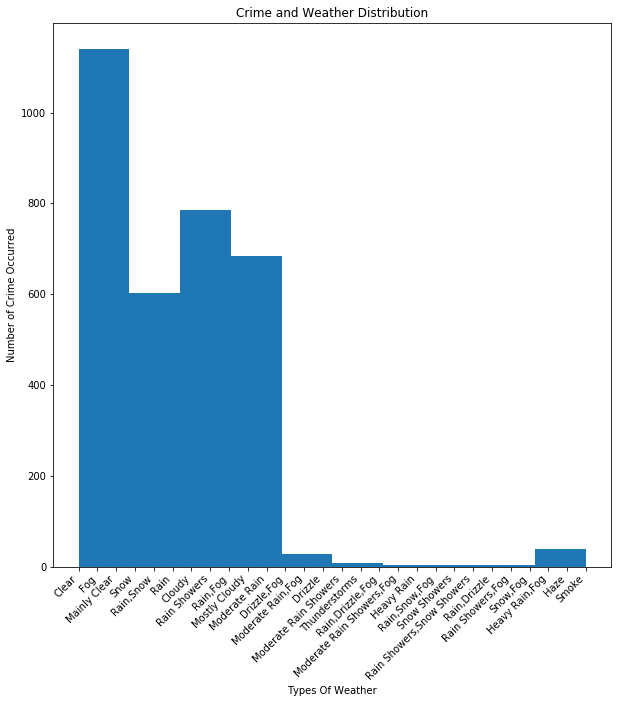

In [87]:
#convertWeather["WeatherLegend"].unique()
plt.figure(figsize=(10,10))
plt.xticks(rotation=45, ha='right')
plt.title("Crime and Weather Distribution")
plt.xlabel("Types Of Weather")
plt.ylabel("Number of Crime Occurred")
plt.hist(crimeDataWithWeather["WEATHER"])

<BarContainer object of 23 artists>

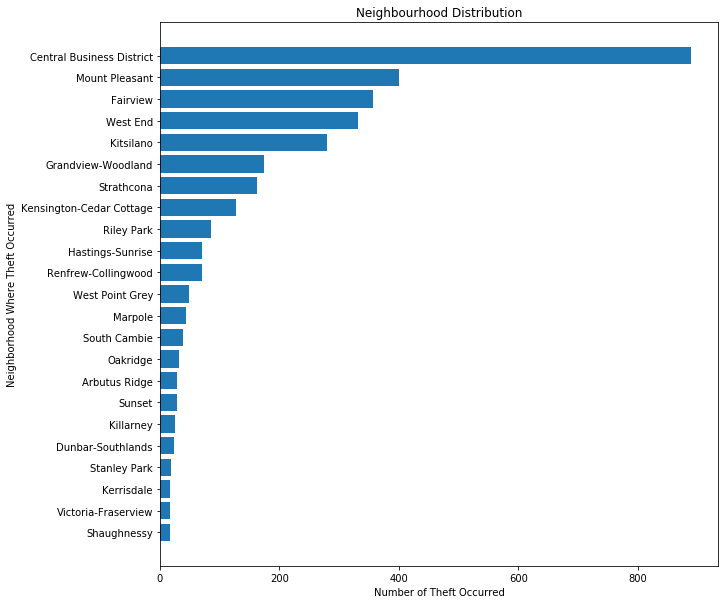

In [86]:
#convertWeather["WeatherLegend"].unique()
plt.figure(figsize=(10,10))
plt.title("Neighbourhood Distribution")
plt.xlabel("Number of Theft Occurred")
plt.ylabel("Neighborhood Where Theft Occurred")
plt.barh(crimeInNeighborhood["NEIGHBOURHOOD"], crimeInNeighborhood["COUNTS"])